In [17]:
import pandas as pd
import numpy as np

In [18]:
total_dataset = 5
n = 1

In [19]:
ecg_pred = list(pd.read_csv(f"results/ECG-dataset-{n}-predictions.csv")["Prediction"])
ppg_pred = list(pd.read_csv(f"results/PPG-dataset-{n}-predictions.csv")["Prediction"])
resp_pred = list(pd.read_csv(f"results/resp-dataset-{n}-predictions.csv")["Prediction"])
y_test = np.load(f'data/train_test_data/dataset_{n}_test_label.npy')


In [20]:
prediction = []
for i in range(len(ecg_pred)):
    prediction.append(1) if (ecg_pred[i] + ppg_pred[i] + resp_pred[i]) > 1 else prediction.append(0)
y_test    

array([1, 1, 1, ..., 1, 1, 1], shape=(2400,))

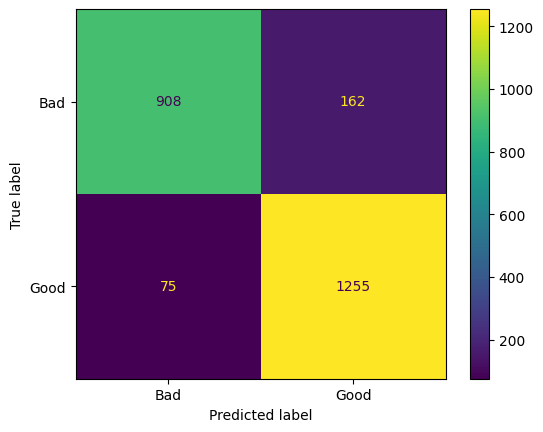

In [21]:
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Bad','Good'])
cm_display.plot()
# cm_display.ax_.set(xlabel='Predicted \n({})'.format(sub_caption), ylabel='True')
# plt.savefig(f'results/figures/fusion/late-fusion-dataset-{n}-confusion.eps', format='eps', bbox_inches='tight')
# plt.show()

In [22]:
# Extracting values from the confusion matrix
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Compute metrics
TPR = TP / (TP + FN)  # True Positive Rate (Recall)
FPR = FP / (FP + TN)  # False Positive Rate
precision = TP / (TP + FP)  # Precision
recall = TPR  # Recall is the same as TPR
f1_score = 2 * (precision * recall) / (precision + recall)  # F1-Score

# Overall accuracy
accuracy = (TP+TN)/(TP+FP+FN+TN)

# Print the metrics
print("True Positive Rate (TPR) / Recall: ", TPR)
print("False Positive Rate (FPR): ", FPR)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)
print("accuracy: ", accuracy)

True Positive Rate (TPR) / Recall:  0.943609022556391
False Positive Rate (FPR):  0.15140186915887852
Precision:  0.8856739590684545
Recall:  0.943609022556391
F1-Score:  0.9137240626137605
accuracy:  0.90125


In [23]:
with open(f'results/late-fusion-dataset-{n}-metrics.txt', 'w') as f:
    f.write(f"Signal,accuracy,TPR,FPR,Precision,Recall,F1-Score\n")
    f.write(f"late fusion,{accuracy},{TPR},{FPR},{precision},{recall},{f1_score}\n")

In [24]:
with open(f'results/late-fusion-dataset-{n}-accuracy.txt', 'w') as f: f.write(str(accuracy))